## 2D fourier of image with numpy

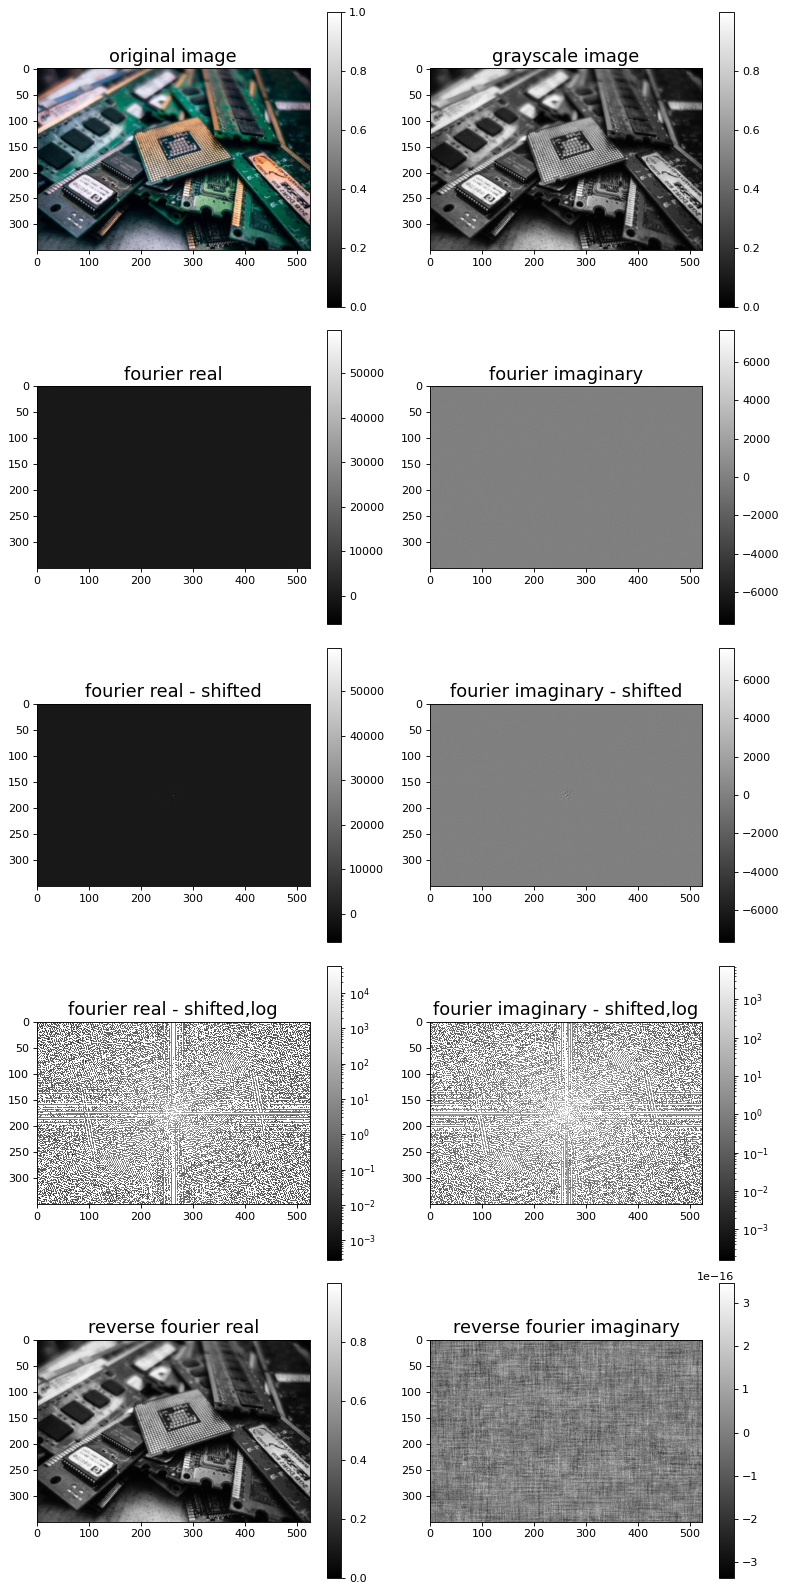

In [8]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])


pic = plt.imread('pcb_small.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array
fourier = np.fft.fft2(bw_pic)
fourier_shift = np.fft.fftshift(fourier)
reverse = np.fft.ifft2(np.fft.ifftshift(fourier_shift))




######################################

fig = plt.figure(figsize=(10,20), dpi=80, facecolor='w', edgecolor='k')
plt.gray()

plt.subplot(5,2,1)
plt.title('original image', fontsize=16)
plt.imshow(pic)
plt.colorbar()

plt.subplot(5,2,2)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()

plt.subplot(5,2,3)
plt.title('fourier real', fontsize=16)
plt.imshow(np.real(fourier))
plt.colorbar()

plt.subplot(5,2,4)
plt.title('fourier imaginary', fontsize=16)
plt.imshow(np.imag(fourier))
plt.colorbar()

plt.subplot(5,2,5)
plt.title('fourier real - shifted', fontsize=16)
plt.imshow(np.real(fourier_shift))
plt.colorbar()

plt.subplot(5,2,6)
plt.title('fourier imaginary - shifted', fontsize=16)
plt.imshow(np.imag(fourier_shift))
plt.colorbar()

plt.subplot(5,2,7)
plt.title('fourier real - shifted,log', fontsize=16)
plt.imshow(np.real(fourier_shift),norm=mpc.LogNorm())
plt.colorbar()

plt.subplot(5,2,8)
plt.title('fourier imaginary - shifted,log', fontsize=16)
plt.imshow(np.imag(fourier_shift),norm=mpc.LogNorm())
plt.colorbar()

plt.subplot(5,2,9)
plt.title('reverse fourier real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.subplot(5,2,10)
plt.title('reverse fourier imaginary', fontsize=16)
plt.imshow(np.imag(reverse))
plt.colorbar()

plt.tight_layout()
plt.show()

## 2D fft & low pass filter

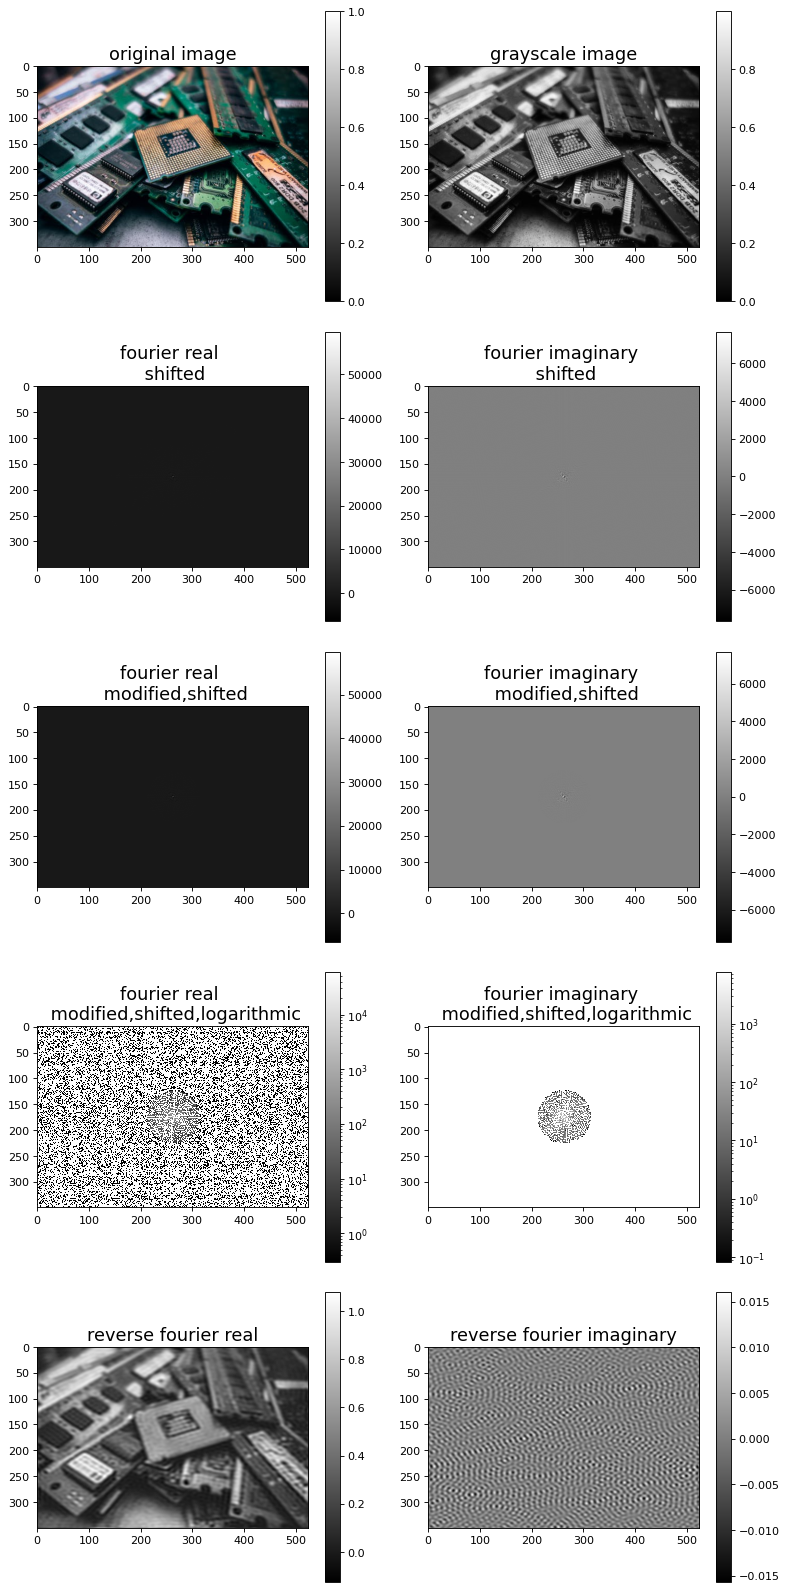

In [9]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

def modify(img):
    r=50
    x,y = np.shape(img)
    for ii in range(0,x):
        for iii in range(0,y):
            if ((ii-x/2)**2+(iii-y/2)**2)>r**2:
                img[ii][iii]=np.complex(0,0)
    return img



fig = plt.figure(figsize=(10,20), dpi=80, facecolor='w', edgecolor='k')
plt.gray()

######################################
pic = plt.imread('pcb_small.png') #350x525x4 array
######################################
plt.subplot(5,2,1)
plt.title('original image', fontsize=16)
plt.imshow(pic)
plt.colorbar()

######################
bw_pic = rgb2gray(pic) #350x525x1 array
######################
plt.subplot(5,2,2)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()

#############################
fourier = np.fft.fft2(bw_pic)
fourier_shift = np.fft.fftshift(fourier)
########################################
plt.subplot(5,2,3)
plt.title('fourier real \n shifted', fontsize=16)
plt.imshow(np.real(fourier_shift))
plt.colorbar()

plt.subplot(5,2,4)
plt.title('fourier imaginary \n shifted', fontsize=16)
plt.imshow(np.imag(fourier_shift))
plt.colorbar()

###################################
fourier_mod = modify(fourier_shift)
###################################
plt.subplot(5,2,5)
plt.title('fourier real \n modified,shifted', fontsize=16)
plt.imshow(np.real(fourier_mod))
plt.colorbar()

plt.subplot(5,2,6)
plt.title('fourier imaginary \n modified,shifted', fontsize=16)
plt.imshow(np.imag(fourier_mod))
plt.colorbar()

plt.subplot(5,2,7)
plt.title('fourier real \n modified,shifted,logarithmic', fontsize=16)
plt.imshow(np.real(fourier_mod),norm=mpc.LogNorm())
plt.colorbar()

plt.subplot(5,2,8)
plt.title('fourier imaginary \n modified,shifted,logarithmic', fontsize=16)
plt.imshow(np.imag(fourier_mod),norm=mpc.LogNorm())
plt.colorbar()


#####################################################
reverse = np.fft.ifft2(np.fft.ifftshift(fourier_mod))
#####################################################
plt.subplot(5,2,9)
plt.title('reverse fourier real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.subplot(5,2,10)
plt.title('reverse fourier imaginary', fontsize=16)
plt.imshow(np.imag(reverse))
plt.colorbar()

plt.tight_layout()
plt.show()

## 2D fft & remove imaginary coefficients
... destroys the image

kill all imaginary fourier coefficients


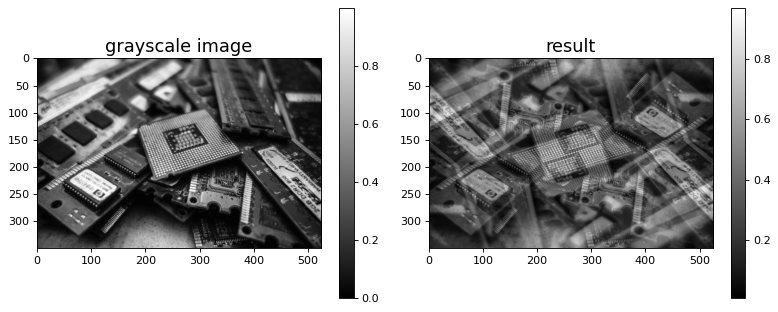

In [10]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])


######################################
pic = plt.imread('pcb_small.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array
fourier = np.fft.fftshift( np.fft.fft2( bw_pic ) )

#kill imaginary coefficients
x,y = np.shape(fourier)
for ii in range(0,x):
    for iii in range(0,y):
        fourier[ii][iii]=np.real(fourier[ii][iii])

reverse = np.fft.ifft2( np.fft.ifftshift( fourier ) )


print('\033[1m'+'kill all imaginary fourier coefficients'+'\033[0;0m')

#####################################################

fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.gray()

plt.subplot(1,2,1)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('result', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.tight_layout()
plt.show()

## 2D fft & keep only big coefficient
... results in lossy compressed image

keep only big coefficients in fourier
158749 coeff. =0 from 183750 coeff.
25001 coeff. left


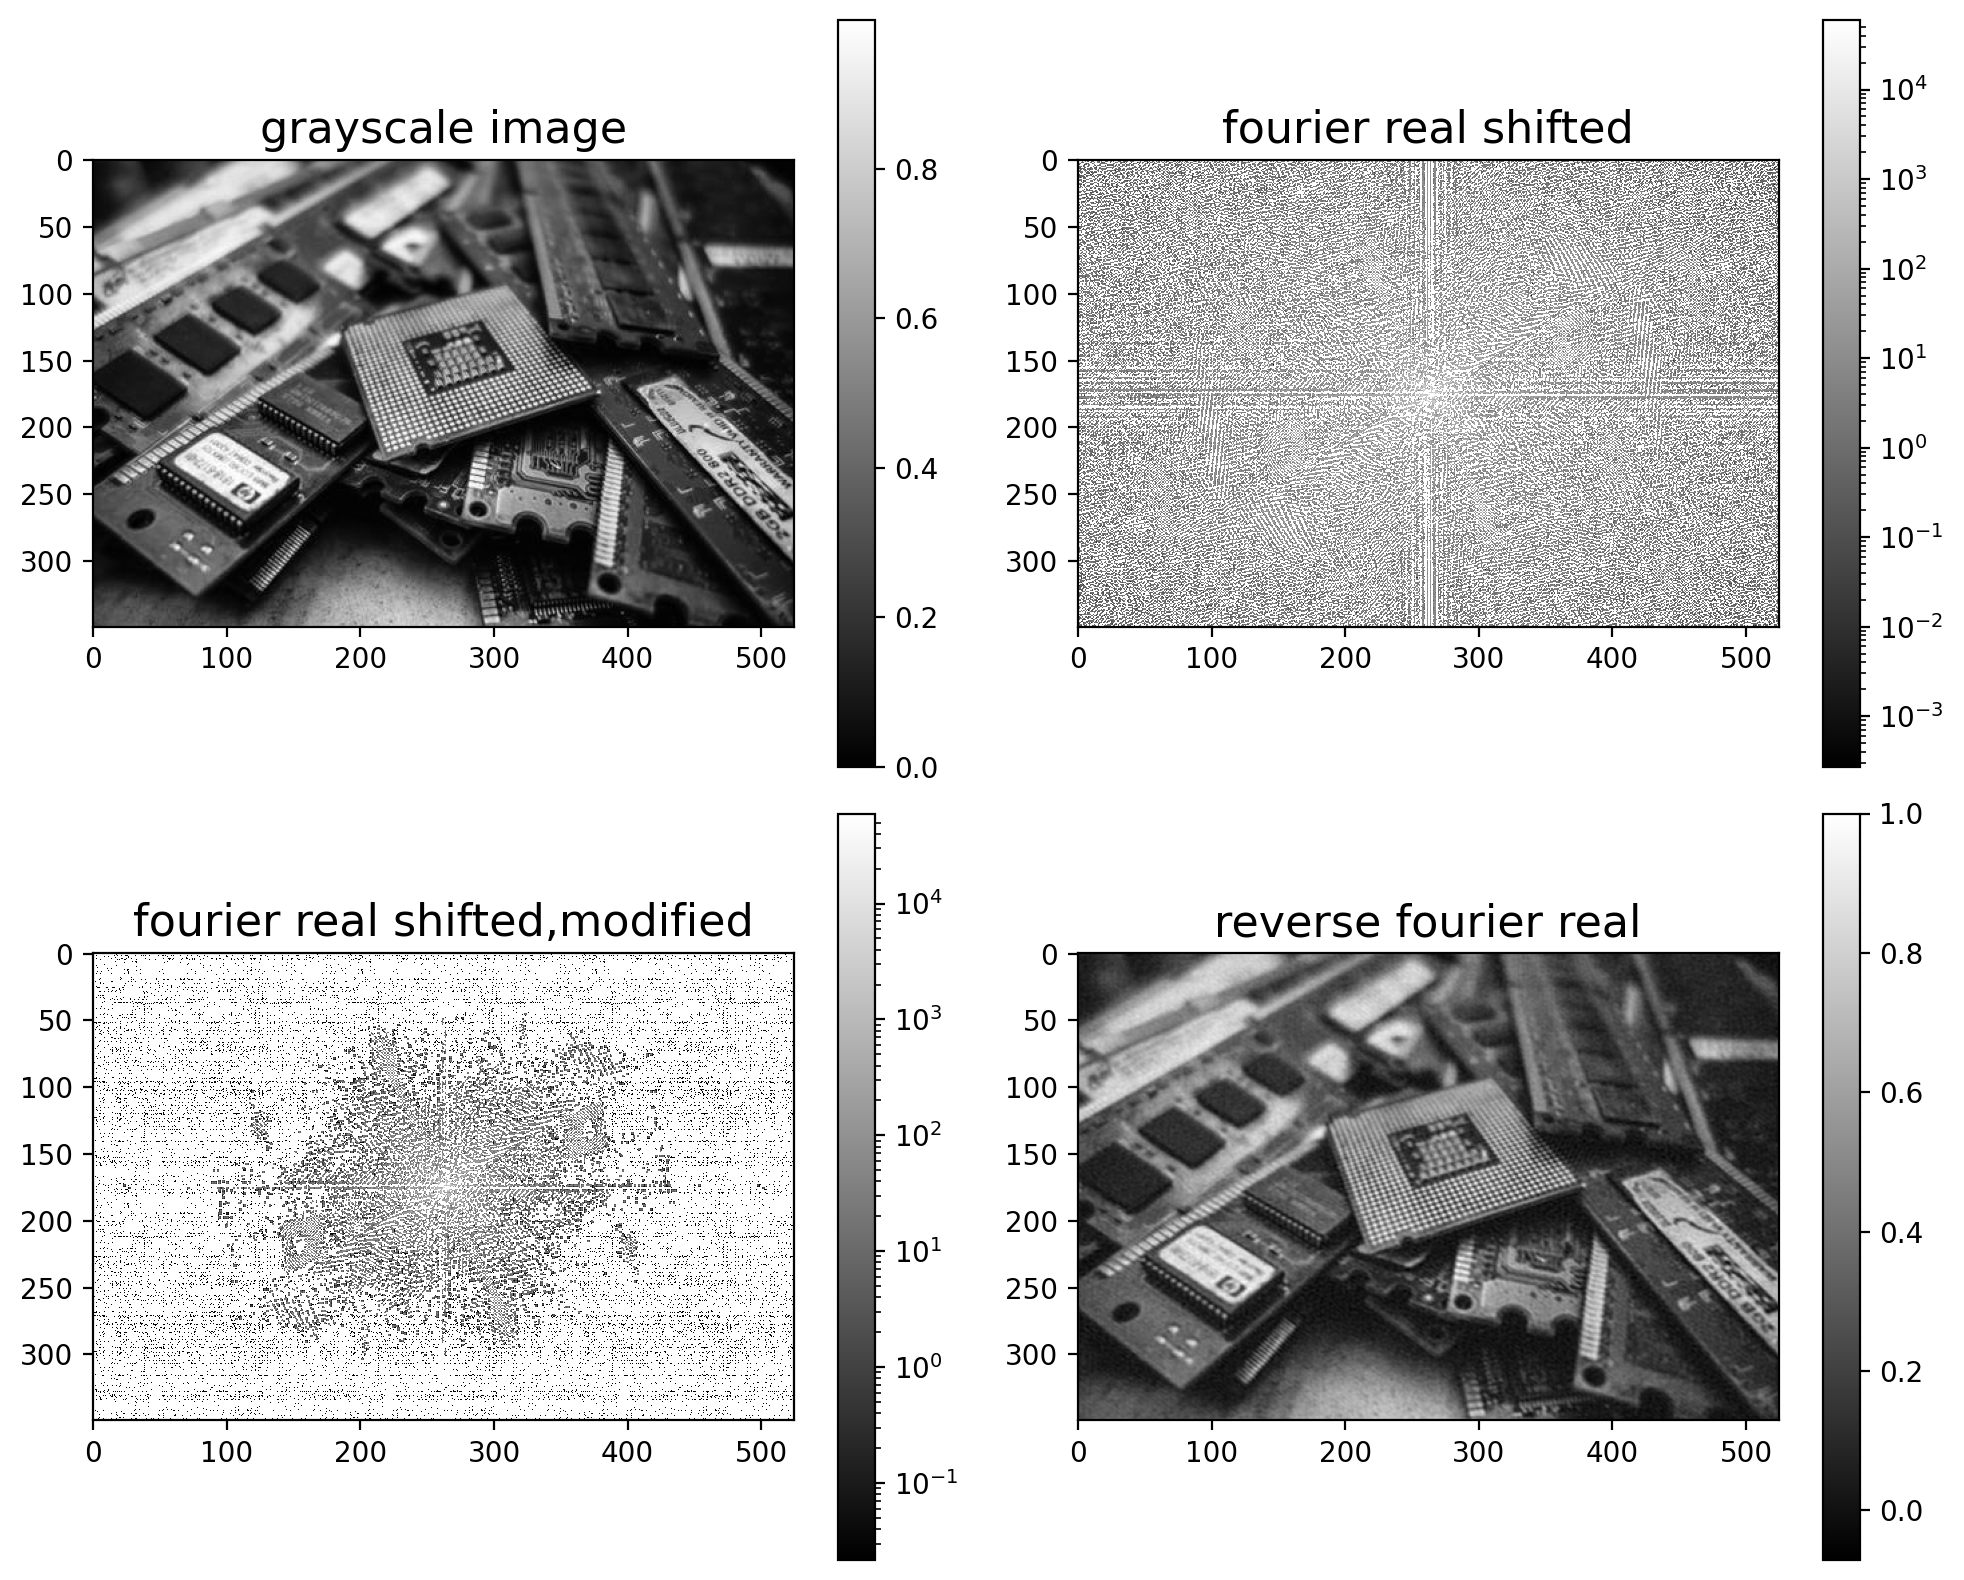

0.0866921139839806


In [11]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

def sparse(f):
    threshold=42.70221
    count=0
    x,y = np.shape(f)
    for ii in range(0,x):
        for iii in range(0,y):
            if np.abs(f[ii][iii])<threshold:
                f[ii][iii]=np.complex(0,0)
                count+=1
    print(str(count)+' coeff. =0 from '+str(x*y)+' coeff.')
    print(str(x*y-count)+' coeff. left')
    return f

#get images
pic = plt.imread('pcb_small.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array

print('\033[1m'+'keep only big coefficients in fourier'+'\033[0;0m')


######################################

fig = plt.figure(figsize=(10,8), dpi=200, facecolor='w', edgecolor='k')
plt.gray()


plt.subplot(2,2,1)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()
#############################
fourier = np.fft.fft2(bw_pic)
#fourier = np.transpose(np.fft.fft(np.transpose(np.fft.fft(bw_pic))))
fourier_shift = np.fft.fftshift(fourier)
########################################
plt.subplot(2,2,2)
plt.title('fourier real shifted', fontsize=16)
plt.imshow(np.real(fourier_shift),norm=mpc.LogNorm())
plt.colorbar()
#########################################
fourier_shift_mod = sparse(fourier_shift)
#########################################
plt.subplot(2,2,3)
plt.title('fourier real shifted,modified', fontsize=16)
plt.imshow(np.real(fourier_shift_mod),norm=mpc.LogNorm())
plt.colorbar()
###########################################################
reverse = np.fft.ifft2(np.fft.ifftshift(fourier_shift_mod))
reverse = reverse/np.amax(reverse)
###########################################################
plt.subplot(2,2,4)
plt.title('reverse fourier real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.tight_layout()
plt.show()

print(np.sum(np.abs(bw_pic)-abs(reverse))/np.sum(np.abs(bw_pic)))

## 2D dct & keep only big coefficient
... results in lossy compressed image.<br>
this time with discrete cosine transform (dct)

keep only big coefficients in dct
158749 coeff. =0 from 183750 coeff.
25001 coeff. left


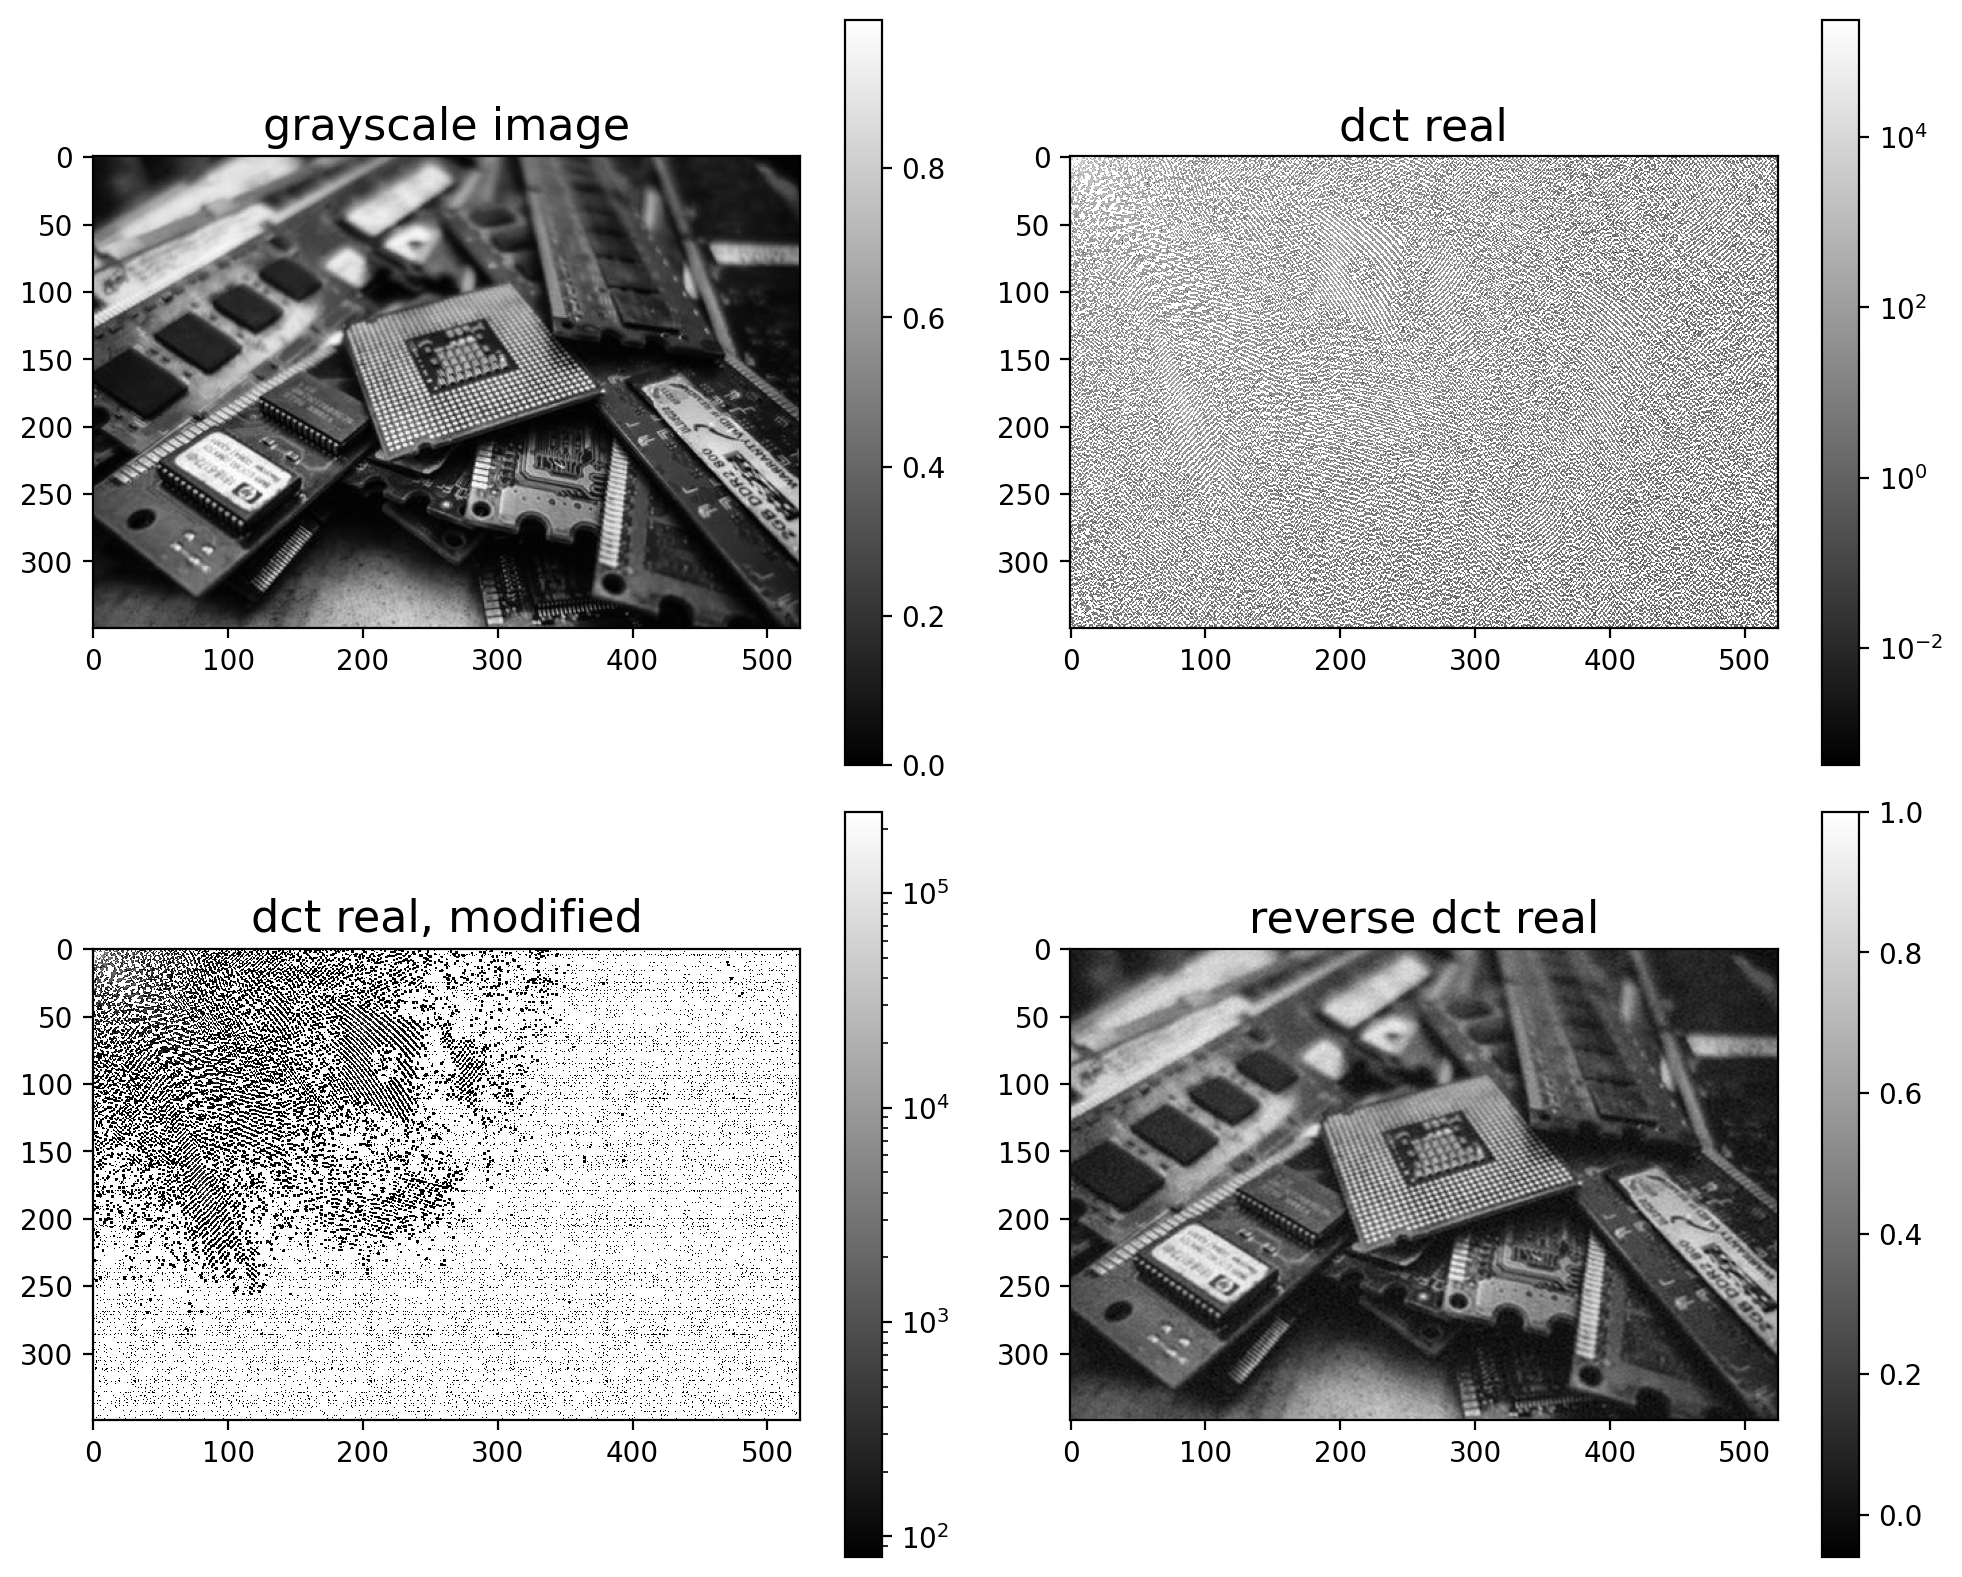

0.07520031345138527


In [12]:
#2D discrete cosine transform of image with numpy -> compression (keep only big coefficients)
%reset -f
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

def sparse(f):
    threshold=80.185
    count=0
    x,y = np.shape(f)
    for ii in range(0,x):
        for iii in range(0,y):
            if np.abs(f[ii][iii])<threshold:
                f[ii][iii]=0
                count+=1
    print(str(count)+' coeff. =0 from '+str(x*y)+' coeff.')
    print(str(x*y-count)+' coeff. left')
    return f

#get images
pic = plt.imread('pcb_small.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array

print('\033[1m'+'keep only big coefficients in dct'+'\033[0;0m')


######################################

fig = plt.figure(figsize=(10,8), dpi=200, facecolor='w', edgecolor='k')
plt.gray()


plt.subplot(2,2,1)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()
#############################
fourier = fft.dct(fft.dct(bw_pic, axis=0),axis=1)
########################################
plt.subplot(2,2,2)
plt.title('dct real', fontsize=16)
plt.imshow(np.real(fourier),norm=mpc.LogNorm())
plt.colorbar()
#########################################
fourier_mod = sparse(fourier)
#########################################
plt.subplot(2,2,3)
plt.title('dct real, modified', fontsize=16)
plt.imshow(np.real(fourier_mod),norm=mpc.LogNorm())
plt.colorbar()
###########################################################
reverse = fft.idct(fft.idct(fourier_mod, axis=0),axis=1)
reverse = reverse/np.amax(reverse)
###########################################################
plt.subplot(2,2,4)
plt.title('reverse dct real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.tight_layout()
plt.show()

print(np.sum(np.abs(bw_pic)-abs(reverse))/np.sum(np.abs(bw_pic)))

## performance comparison of different transforms
on intel i7-7700HQ

In [1]:
%reset
import numpy as np
import scipy.fftpack as fft

xn = np.round(np.random.rand(1000),1)*10

%timeit fft.fft(xn)
%timeit fft.rfft(xn)
%timeit fft.dct(xn, type=2)
%timeit fft.dst(xn, type=2)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
10.1 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.9 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19.2 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19.7 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
